# Homework 11: PARKING TICKETS

Data is here: https://www.dropbox.com/s/4cbpwdcd802av1z/11-homework-data.zip?dl=0 [ www.dropbox.com/s/4cbpwdcd802av1z/11-homework-data.zip?dl=0 ]

Read this: http://iquantny.tumblr.com/post/144197004989/the-nypd-was-systematically-ticketing-legally

And the then we can take a peek at some data on parking. After you've cleaned up the data as instructed below, feel free to browse in other directions than the ones I say. When fixing up the data, you'll probably making a lot of use of date parsing and .apply.

In [460]:
import pandas as pd

### I want to make sure my Plate ID is a string. Can't lose the leading zeroes!
### don't think anyone's car was built in 0AD. Discard the '0's as NaN.
### I want the dates to be dates! Read the read_csv documentation to find out how to make pandas automatically parse dates.

In [461]:
col_types = { 'Summons Number' : 'int', 'Plate ID': 'str', 'Violation Code': 'int', 'Street Code1': 'int', 'Street Code2': 'int', 'Street Code3': 'int',
       'Vehicle Expiration Date': 'str', 'Date First Observed': 'str', 'Violation Time' : 'str' }
dateparse = lambda x: pd.datetime.strptime(x, '%m/%d/%Y')

df = pd.read_csv('/home/this/Downloads/bills/very-small-violations.csv', dtype=col_types, na_values=["0AD"], parse_dates=['Issue Date'], date_parser=dateparse)

In [462]:
df.columns

Index(['Summons Number', 'Plate ID', 'Registration State', 'Plate Type',
       'Issue Date', 'Violation Code', 'Vehicle Body Type', 'Vehicle Make',
       'Issuing Agency', 'Street Code1', 'Street Code2', 'Street Code3',
       'Vehicle Expiration Date', 'Violation Location', 'Violation Precinct',
       'Issuer Precinct', 'Issuer Code', 'Issuer Command', 'Issuer Squad',
       'Violation Time', 'Time First Observed', 'Violation County',
       'Violation In Front Of Or Opposite', 'House Number', 'Street Name',
       'Intersecting Street', 'Date First Observed', 'Law Section',
       'Sub Division', 'Violation Legal Code', 'Days Parking In Effect    ',
       'From Hours In Effect', 'To Hours In Effect', 'Vehicle Color',
       'Unregistered Vehicle?', 'Vehicle Year', 'Meter Number',
       'Feet From Curb', 'Violation Post Code', 'Violation Description',
       'No Standing or Stopping Violation', 'Hydrant Violation',
       'Double Parking Violation'],
      dtype='object')

In [463]:
df.head(20)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Vehicle Color,Unregistered Vehicle?,Vehicle Year,Meter Number,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,GY,0,2013,-,0,NaN,NaN,NaN,NaN,NaN
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,WH,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,CHEVR,P,37030,...,NaN,0,0,-,0,NaN,NaN,NaN,NaN,NaN
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,FORD,P,37270,...,WH,0,2010,-,0,NaN,NaN,NaN,NaN,NaN
4,1283294187,91648MC,NY,COM,2013-08-08,41,TRLR,GMC,P,37240,...,BR,0,2012,-,0,NaN,NaN,NaN,NaN,NaN
5,1283294217,T60DAR,NJ,PAS,2013-08-11,14,P-U,DODGE,P,37250,...,RD,0,0,-,0,NaN,NaN,NaN,NaN,NaN
6,1283294229,GCR2838,NY,PAS,2013-08-11,14,VAN,NaN,P,37250,...,GN,0,2011,-,0,NaN,NaN,NaN,NaN,NaN
7,1283983620,XZ764G,NJ,PAS,2013-08-07,24,DELV,FORD,X,63430,...,WHITE,0,0,-,0,NaN,NaN,NaN,NaN,NaN
8,1283983631,GBH9379,NY,PAS,2013-08-07,24,SDN,TOYOT,X,63430,...,WHITE,0,2001,-,0,NaN,NaN,NaN,NaN,NaN
9,1283983667,MCL78B,NJ,PAS,2013-07-18,24,SDN,SUBAR,H,0,...,BLACK,0,2005,-,0,NaN,NaN,NaN,NaN,NaN


### "Date first observed" is a pretty weird column, but it seems like it has a date hiding inside. Using a function with .apply, transform the string (e.g. "20140324") into a Python date. Make the 0's show up as NaN.

In [464]:
# Why does this cell only work for the first time I am running it? 

from datetime import datetime
from dateutil.parser import parse

def str_to_date(string):
    if isinstance(string, str):
        if string == '0':
            return 'None'
        if string == 'NaN':
            return 'None'
        else: 
            return datetime.strptime(string, '%Y%m%d')
    
df['Date First Observed'] = df['Date First Observed'].apply(str_to_date)

### "Violation time" is... not a time. Make it a time.

In [465]:
import re

def str_to_time(string):
    new_string = str(string)
    if re.match(r'00\d\dA', new_string): # Change the 00XX values to 12XX.
        new_string = re.sub(r'00', '12', new_string)
    if 'P' in new_string: 
        temp_time = new_string[:-1] + 'PM'
        time = datetime.strptime(temp_time, '%I%M%p').strftime('%H:%M')
        return time
    elif 'A' in new_string:
        temp_time = new_string[:-1] + 'AM'
        time = datetime.strptime(temp_time, '%I%M%p').strftime('%H:%M')
        return time

df['Violation Time'] = df['Violation Time'].apply(str_to_time)
print(df['Violation Time'].head(10))

0    07:52
1    12:40
2    12:43
3    14:32
4    12:39
5    18:17
6    19:41
7    04:25
8    04:37
9    08:39
Name: Violation Time, dtype: object


### There sure are a lot of colors of cars, too bad so many of them are the same. Make "BLK" and "BLACK", "WT" and "WHITE", and any other combinations that you notice.

In [466]:
def abbrev_to_color(abbrev):
    # Colors codes from http://industries.ul.com/plastics-and-components/plastics/color-codes-and-abbreviations.
    # First ones are own interpretations.
    colors = { 'BLK' : 'BLACK', 'WT' : 'WHITE', 'WHT' : 'WHITE', 'GRY' : 'GRAY', 'BR': 'Brown', 'WH' : 'WHITE', 'GR' : 'GRAY', 'AL' : 'Aluminium', 'AM' : 'Amber', 'AO' : 'All opaque', 'AT' : 'All transparent', 'BG' : 'Beige', 'BK' : 'Black', 'BL' : 'Blue', 'BN' : 'Brown', 'BZ' : 'Bronze', 'CH' : 'Charcoal', 'CL' : 'Clear', 'CT' : 'Clear', 'DK' : 'Dark', 'GD' : 'Gold',  'GN' : 'Green', 'GY' : 'Gray', 'GT' : 'Granite', 'IV' : 'Ivory', 'LT' : 'Light', 'NC' : 'Natural', 'OL' : 'Olive', 'OP' : 'Opaque', 'OR' : 'Orange', 'PK' : 'ink', 'RD' : 'Red', 'SM' : 'Smoke', 'TL' : 'Translucent', 'TN' : 'Tan', 'TP' : 'Transparent', 'VT' : 'Violet', 'WT' : 'White', 'YL' : 'Yellow'}
    if abbrev in colors: 
        return colors[abbrev].upper()
    else:
        return abbrev

df['Vehicle Color'] = df['Vehicle Color'].apply(abbrev_to_color)
df['Vehicle Color'].value_counts().head(10)

WHITE    1245
BLACK     941
GRAY      676
BLUE      414
RED       284
BROWN     249
SILVE     241
GREY      188
GREEN     154
TAN       106
Name: Vehicle Color, dtype: int64

### Join the data with the Parking Violations Code dataset from the NYC Open Data site.

In [467]:
df_codes = pd.read_csv('/home/this/Downloads/bills/DOF_Parking_Violation_Codes.csv')

In [468]:
# That's the work of late last evening. This morning I figured out: 
# I might correct the values of the small Codes file in less than a minute in my spreadsheet program...
'''print("Type of df's Violation Code:", type(df['Violation Code'][8]))
print("Type of df_codes' CODE:", type(df_codes['CODE'][8]))

def drop_the_dollar(string):
    if hasNumbers(string) == True: 
        if '$' in string: 
            string = string.strip('$')
        if re.match(r'\d+\s?\w+', string):
            temp_string = re.match(r'(\d+)\s?\w*', string)
            temp_string = int(temp_string)
            print(temp_string)
            string = temp_string.group(1)
        string = int(string)
        return string
    else:
        return 'None'

def hasNumbers(string):
    return any(char.isdigit() for char in string)
    
df_codes['bill'] = df_codes['All Other Areas'].apply(drop_the_dollar) 
df_codes['code_int'] = df_codes['CODE'].apply(code_to_int)
print("Type of df_codes' code_int:", type(df_codes['code_int'][8]))'''

'print("Type of df\'s Violation Code:", type(df[\'Violation Code\'][8]))\nprint("Type of df_codes\' CODE:", type(df_codes[\'CODE\'][8]))\n\ndef drop_the_dollar(string):\n    if hasNumbers(string) == True: \n        if \'$\' in string: \n            string = string.strip(\'$\')\n        if re.match(r\'\\d+\\s?\\w+\', string):\n            temp_string = re.match(r\'(\\d+)\\s?\\w*\', string)\n            temp_string = int(temp_string)\n            print(temp_string)\n            string = temp_string.group(1)\n        string = int(string)\n        return string\n    else:\n        return \'None\'\n\ndef hasNumbers(string):\n    return any(char.isdigit() for char in string)\n    \ndf_codes[\'bill\'] = df_codes[\'All Other Areas\'].apply(drop_the_dollar) \ndf_codes[\'code_int\'] = df_codes[\'CODE\'].apply(code_to_int)\nprint("Type of df_codes\' code_int:", type(df_codes[\'code_int\'][8]))'

In [469]:
# Convert the CODES to Int

print(type(df_codes['CODE']))

def code_to_int(string):
    if re.match(r'\d+\-\d+', string):
        string = string[:-3]
    return int(string)

df_codes['CODE'] = df_codes['CODE'].apply(code_to_int)

<class 'pandas.core.series.Series'>


In [470]:
# Merge the two data sets. 
# Get rid of some extra spaces. 

df_merged = df.merge(df_codes, left_on='Violation Code', right_on='CODE', how='left')
[col.strip() for col in df_merged.columns]
df_merged.head(5)

,Summons Number,Plate ID,Registration State,Plate Type,Issue Date,Violation Code,Vehicle Body Type,Vehicle Make,Issuing Agency,Street Code1,...,Feet From Curb,Violation Post Code,Violation Description,No Standing or Stopping Violation,Hydrant Violation,Double Parking Violation,CODE,DEFINITION,Manhattan 96th St. & below,All Other Areas
0,1283294138,GBB9093,NY,PAS,2013-08-04,46,SUBN,AUDI,P,37250,...,0,NaN,NaN,NaN,NaN,NaN,46.0,Standing or parking on the roadway side of a v...,115.0,115.0
1,1283294151,62416MB,NY,COM,2013-08-04,46,VAN,FORD,P,37290,...,0,NaN,NaN,NaN,NaN,NaN,46.0,Standing or parking on the roadway side of a v...,115.0,115.0
2,1283294163,78755JZ,NY,COM,2013-08-05,46,P-U,CHEVR,P,37030,...,0,NaN,NaN,NaN,NaN,NaN,46.0,Standing or parking on the roadway side of a v...,115.0,115.0
3,1283294175,63009MA,NY,COM,2013-08-05,46,VAN,FORD,P,37270,...,0,NaN,NaN,NaN,NaN,NaN,46.0,Standing or parking on the roadway side of a v...,115.0,115.0
4,1283294187,91648MC,NY,COM,2013-08-08,41,TRLR,GMC,P,37240,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### How much money did NYC make off of parking violations?

In [471]:
print("NYC makes about", df_merged['All Other Areas'].sum(), "dollar off of parking violations.")

NYC makes about 399080.0 dollar off of parking violations.


### What's the most lucrative kind of parking violation? The most frequent?

In [472]:
# The most lucrative parking violation.

df_merged.groupby(['CODE','DEFINITION'])['All Other Areas'].sum().sort_values(ascending=False).head(1)

CODE  DEFINITION                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        
46.0  Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking". However, a person may stand a Commercial Vehicle alongside a vehicle parked at the curb at s

In [473]:
# The most frequent violations.

df_merged['DEFINITION'].value_counts().head(5)

Street Cleaning: No parking where parking is not allowed by sign, street marking or traffic control device.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           1189
Standing or parking on the roadway side of a vehicle stopped, standing or parked at the curb; in other words also known as "double parking". However, a person may stand a Commercial Vehicle alongside a vehicle parked at the curb at such 

### New Jersey has bad drivers, but does it have bad parkers, too? How much money does NYC make off of all non-New York vehicles?


In [474]:
nj_bills = df_merged[df_merged['Registration State'] == 'NJ']['All Other Areas'].sum()
print("NYC makes", nj_bills, "Dollars because the guys from New Jersey ignore -- or don't know -- the parking laws.")

nny_bills = df_merged[df_merged['Registration State'] != 'NY']['All Other Areas'].sum()
print("NYC makes", nny_bills, "Dollars because the guys from outside don't respect the locael parking rules.")


NYC makes 42200.0 Dollars because the guys from New Jersey ignore -- or don't know -- the parking laws.
NYC makes 136560.0 Dollars because the guys from outside don't respect the locael parking rules.


### Make a chart of the top few.


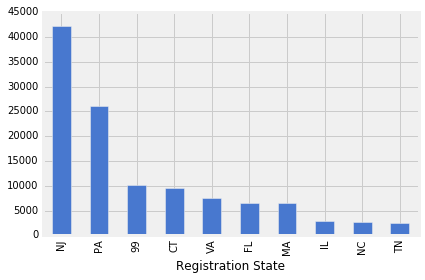

In [475]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-muted')

top_bill_payer = df_merged[df_merged['Registration State'] != 'NY'].groupby(['Registration State'])['All Other Areas'].sum().sort_values(ascending=False).head(10)
top_bill_payer.plot(kind='bar')

### What time of day do people usually get their tickets? You can break the day up into several blocks - for example 12am-6am, 6am-12pm, 12pm-6pm, 6pm-12am.


In [516]:
night = df_merged[(df_merged['Violation Time'] >= '00:00') & (df['Violation Time'] < '06:00')]
morning = df_merged[(df_merged['Violation Time'] >= '06:00') & (df['Violation Time'] < '12:00')]
afternoon = df_merged[(df_merged['Violation Time'] >= '12:00') & (df['Violation Time'] < '18:00')]
evening = df_merged[(df_merged['Violation Time'] >= '18:00') & (df['Violation Time'] < '24:00')]

print("Night:", night['Summons Number'].count(), "counts.", )
print("Morning:", morning['Summons Number'].count(), "counts.")
print("Afternoon", afternoon['Summons Number'].count(), "counts.")
print("Evening:", evening['Summons Number'].count(), "counts.")

Night: 744 counts.
Morning: 2090 counts.
Afternoon 1204 counts.
Evening: 957 counts.


### What's the average ticket cost in NYC?

In [402]:
mean_fines = str(df_codes['All Other Areas'].mean())
mean_tickets = str(df_merged['All Other Areas'].mean())

print("The average of the fines in the catalogue is", mean_fines + '.')
print("The average costs per ticket is", mean_tickets + '.')


The average of the fines in the catalogue is 86.4634146341.
The average costs per ticket is 81.2624720016.


### Make a graph of the number of tickets per day.

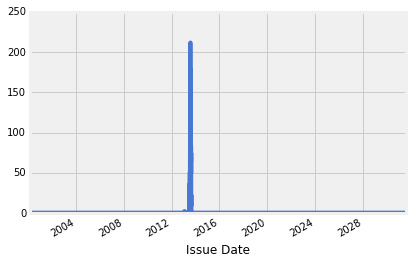

In [518]:
df_merged['Issue Date'].groupby(df_merged['Issue Date']).count().plot()

### Make a graph of the amount of revenue collected per day.

([], <a list of 0 Text xticklabel objects>)

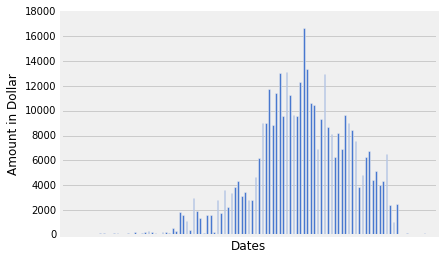

In [517]:
df_merged.groupby('Issue Date')['All Other Areas'].sum().plot(kind='bar')
plt.xlabel('Dates')
plt.ylabel('Amount in Dollar')
plt.xticks([])

### Manually construct a dataframe out of https://dmv.ny.gov/statistic/2015licinforce-web.pdf (only NYC boroughts - bronx, queens, manhattan, staten island, brooklyn), having columns for borough name, abbreviation, and number of licensed drivers.

### What's the parking-ticket-$-per-licensed-driver in each borough of NYC? Do this with pandas and the dataframe you just made, not with your head!